In [1]:
import glob

import xarray as xr
from xclim import sdba
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Hobart
lat = -42.9
lon = 147.3

## Historical data

In [3]:
hist_files = ['/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/day/atmos/day/r1i1p1/latest/tasmax/tasmax_day_ACCESS1-3_historical_r1i1p1_19750101-19991231.nc',
              '/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/day/atmos/day/r1i1p1/latest/tasmax/tasmax_day_ACCESS1-3_historical_r1i1p1_20000101-20051231.nc']

In [4]:
hist_start = '1986-01-01'
hist_end = '2005-12-31'

In [5]:
ds_hist = xr.open_mfdataset(hist_files)
da_hist = ds_hist['tasmax']
da_hist = da_hist.sel({'time': slice(hist_start, hist_end)})
da_hist.data = da_hist.data - 273.15
da_hist.attrs['units'] = 'C'
da_hist = da_hist.chunk({'time': -1})
da_hist

<xarray.DataArray 'tasmax' (time: 7305, lat: 145, lon: 192)>
dask.array<rechunk-merge, shape=(7305, 145, 192), dtype=float32, chunksize=(7305, 145, 192), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1986-01-01T12:00:00 ... 2005-12-31T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 1.5
Attributes:
    standard_name:     air_temperature
    long_name:         Daily Maximum Near-Surface Air Temperature
    units:             C
    cell_methods:      time: maximum
    cell_measures:     area: areacella
    history:           2012-04-03T11:23:29Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [6]:
da_hist_hbt = da_hist.sel({'lat': lat, 'lon': lon}, method='nearest', drop=True)

## Future data

In [7]:
rcp_files = ['/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-3/rcp45/day/atmos/day/r1i1p1/latest/tasmax/tasmax_day_ACCESS1-3_rcp45_r1i1p1_20060101-20301231.nc',
             '/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-3/rcp45/day/atmos/day/r1i1p1/latest/tasmax/tasmax_day_ACCESS1-3_rcp45_r1i1p1_20310101-20551231.nc']

In [8]:
rcp_start = '2021-01-01'
rcp_end = '2040-12-31'

In [9]:
ds_rcp = xr.open_mfdataset(rcp_files)
da_rcp = ds_rcp['tasmax']
da_rcp = da_rcp.sel({'time': slice(rcp_start, rcp_end)})
da_rcp.data = da_rcp.data - 273.15
da_rcp.attrs['units'] = 'C'
da_rcp = da_rcp.chunk({'time': -1})
da_rcp

<xarray.DataArray 'tasmax' (time: 7305, lat: 145, lon: 192)>
dask.array<rechunk-merge, shape=(7305, 145, 192), dtype=float32, chunksize=(7305, 145, 192), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01T12:00:00 ... 2040-12-31T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 1.5
Attributes:
    standard_name:     air_temperature
    long_name:         Daily Maximum Near-Surface Air Temperature
    units:             C
    cell_methods:      time: maximum
    cell_measures:     area: areacella
    history:           2012-04-03T07:15:04Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [10]:
da_rcp_hbt = da_rcp.sel({'lat': lat, 'lon': lon}, method='nearest', drop=True)

## Obs data

In [11]:
obs_files = glob.glob('/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_*.nc')
obs_files.sort()

In [12]:
obs_files

['/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1910.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1911.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1912.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1913.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1914.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1915.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1916.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1917.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1918.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1919.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1920.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1921.nc',
 '/g/data/zv2/ag

In [13]:
ds_obs = xr.open_mfdataset(obs_files)
da_obs = ds_obs['tmax']
da_obs = da_obs.sel({'time': slice(hist_start, hist_end)})
da_obs = da_obs.chunk({'time': -1})
da_obs.attrs['units'] = 'C'
da_obs

<xarray.DataArray 'tmax' (time: 7305, lat: 691, lon: 886)>
dask.array<rechunk-merge, shape=(7305, 691, 886), dtype=float32, chunksize=(7305, 691, 886), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1986-01-01T09:00:00 ... 2005-12-31T09:00:00
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
Attributes:
    cell_methods:               time: maximum
    units:                      C
    analysis_version_number:    2.01
    long_name:                  Daily maximum air temperature
    standard_name:              air_temperature
    frequency:                  daily
    length_scale_for_analysis:  250.0
    grid_mapping:               crs
    coverage_content_type:      physicalMeasurement
    valid_range:                [-100.  100.]

In [14]:
da_obs_hbt = da_obs.sel({'lat': lat, 'lon': lon}, method='nearest', drop=True)

## Quantile mapping - one grid point

In [16]:
qm_hbt = sdba.EmpiricalQuantileMapping.train(
    da_rcp_hbt, da_hist_hbt, nquantiles=100, group="time.month", kind="+"
)

In [17]:
qm_hbt

EmpiricalQuantileMapping(group=Grouper(add_dims=[], name='time.month', window=1), kind='+')

In [18]:
qm_hbt.ds

<xarray.Dataset>
Dimensions:    (month: 12, quantiles: 100)
Coordinates:
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * quantiles  (quantiles) float64 0.005 0.015 0.025 0.035 ... 0.975 0.985 0.995
    height     float64 1.5
Data variables:
    af         (month, quantiles) float32 dask.array<chunksize=(12, 100), meta=np.ndarray>
    hist_q     (month, quantiles) float32 dask.array<chunksize=(12, 100), meta=np.ndarray>
Attributes:
    _xclim_adjustment:  {"py/object": "xclim.sdba.adjustment.EmpiricalQuantil...
    adj_params:         EmpiricalQuantileMapping(group=Grouper(add_dims=[], n...

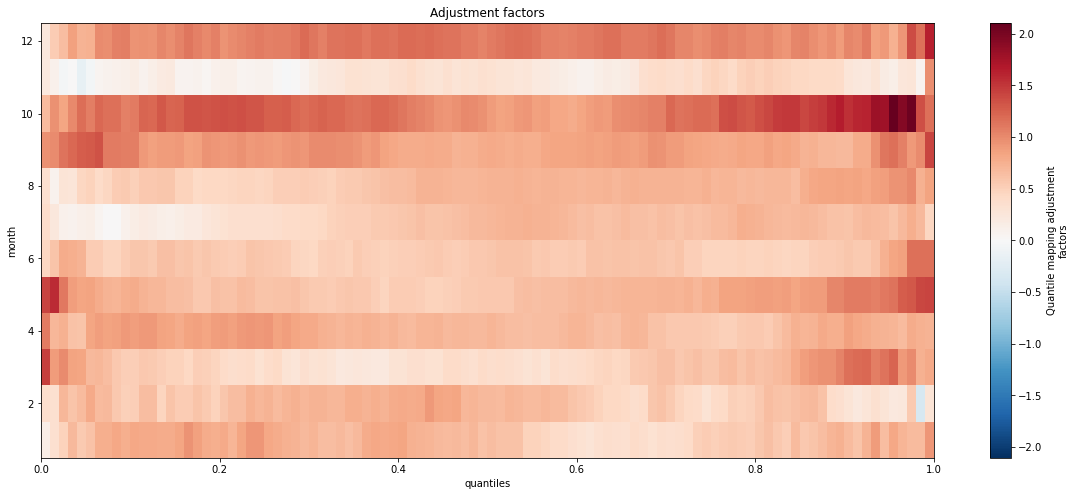

In [19]:
fig, ax = plt.subplots(figsize=[20, 8])
qm_hbt.ds['af'].plot()
plt.title('Adjustment factors')
plt.show()

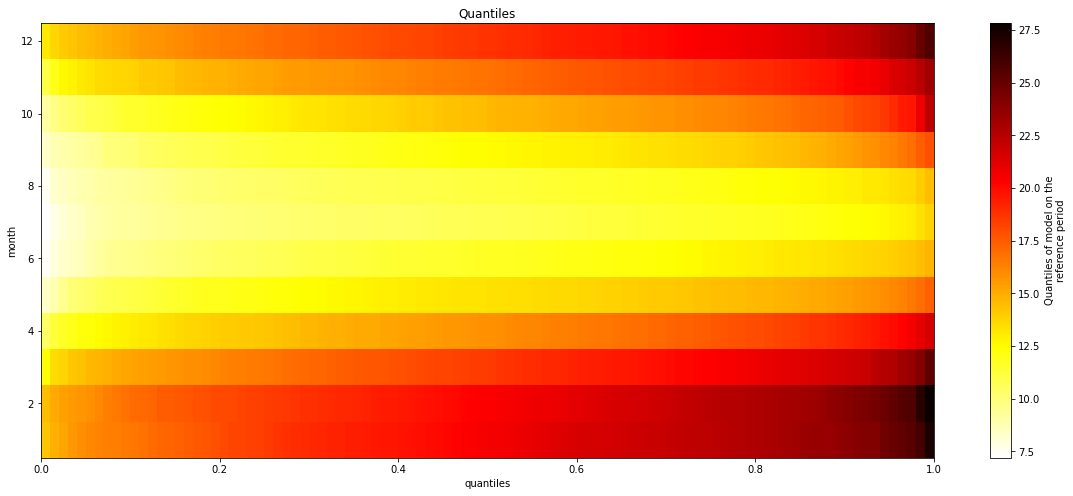

In [21]:
fig, ax = plt.subplots(figsize=[20, 8])
qm_hbt.ds['hist_q'].plot(cmap='hot_r')
plt.title('Quantiles')
plt.show()

In [22]:
qq_obs_hbt = qm_hbt.adjust(da_obs_hbt, extrapolation="constant", interp="linear")#, compat='override')

In [23]:
qq_obs_hbt = qq_obs_hbt.compute()

In [24]:
qq_obs_hbt

<xarray.DataArray 'scen' (time: 7305)>
array([17.793688, 15.147983, 19.542315, ..., 25.05057 , 25.27977 ,
       19.31452 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1986-01-01T09:00:00 ... 2005-12-31T09:00:00
    height   float64 1.5
Attributes:
    cell_methods:               time: maximum
    units:                      C
    analysis_version_number:    2.01
    long_name:                  Daily maximum air temperature
    standard_name:              air_temperature
    frequency:                  daily
    length_scale_for_analysis:  250.0
    grid_mapping:               crs
    coverage_content_type:      physicalMeasurement
    valid_range:                [-100.  100.]
    history:                    [2022-05-03 12:30:50] : Bias-adjusted with Em...
    bias_adjustment:            EmpiricalQuantileMapping(group=Grouper(add_di...

In [25]:
diff = da_rcp_hbt['time'].values[0] - qq_obs_hbt['time'].values[0]
diff

numpy.timedelta64(1104548400000000000,'ns')

In [26]:
qq_obs_hbt = qq_obs_hbt.rename('tmax')

In [27]:
qq_obs_hbt = qq_obs_hbt.assign_coords({'time': qq_obs_hbt['time'].values + diff})

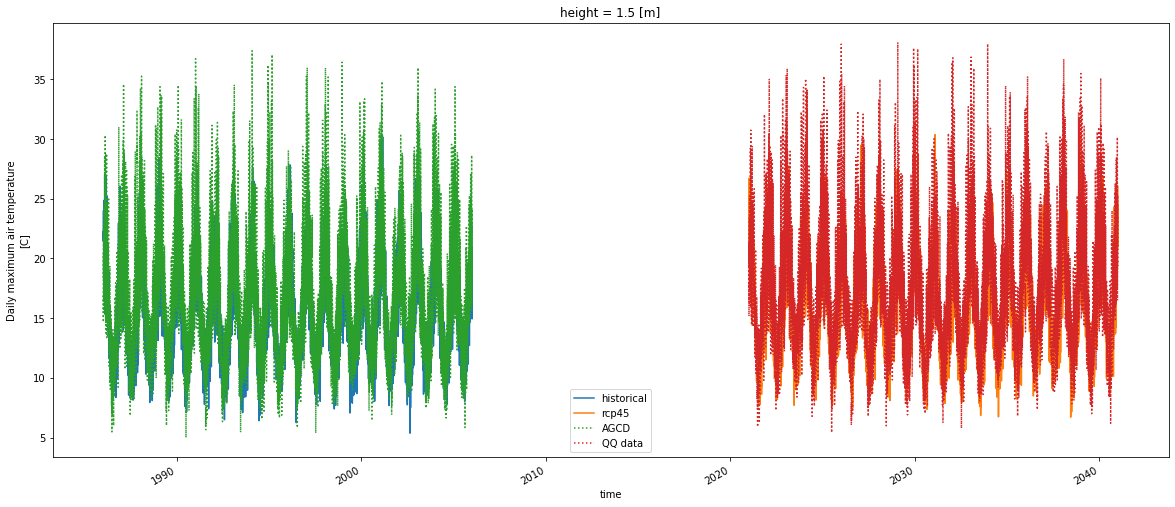

In [28]:
fig, ax = plt.subplots(figsize=[20, 8])
da_hist_hbt.plot(label="historical")
da_rcp_hbt.plot(label="rcp45")
da_obs_hbt.plot(label="AGCD", linestyle=':')
qq_obs_hbt.plot(label="QQ data", linestyle=':')
plt.legend()
plt.show()

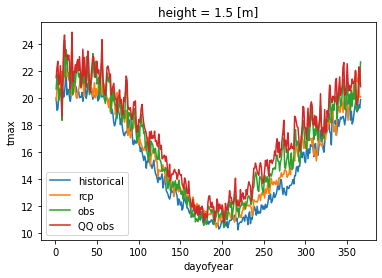

In [29]:
da_hist_hbt.groupby("time.dayofyear").mean().plot(label="historical")
da_rcp_hbt.groupby("time.dayofyear").mean().plot(label="rcp")
da_obs_hbt.groupby("time.dayofyear").mean().plot(label="obs")
qq_obs_hbt.groupby("time.dayofyear").mean().plot(label="QQ obs")
plt.legend()
plt.show()

## Full lat-lon field

Calculate the adjustment factors on the native model grid and then re-grid the factors to the AGCD grid.

In [30]:
qm = sdba.EmpiricalQuantileMapping.train(
    da_rcp, da_hist, nquantiles=100, group="time.month", kind="+"
)

/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/g/data/xv83/dbi599/miniconda3/envs/qqscale/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  ret

In [33]:
qm.ds

<xarray.Dataset>
Dimensions:    (lon: 192, lat: 145, month: 12, quantiles: 100)
Coordinates:
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * quantiles  (quantiles) float64 0.005 0.015 0.025 0.035 ... 0.975 0.985 0.995
    height     float64 1.5
Data variables:
    af         (lon, lat, month, quantiles) float32 dask.array<chunksize=(192, 145, 12, 100), meta=np.ndarray>
    hist_q     (lon, lat, month, quantiles) float32 dask.array<chunksize=(192, 145, 12, 100), meta=np.ndarray>
Attributes:
    _xclim_adjustment:  {"py/object": "xclim.sdba.adjustment.EmpiricalQuantil...
    adj_params:         EmpiricalQuantileMapping(group=Grouper(add_dims=[], n...